Fold 1: AUROC: 0.9341, AUPRC: 0.8445
Fold 2: AUROC: 0.9245, AUPRC: 0.7996
Fold 3: AUROC: 0.9280, AUPRC: 0.8085
Fold 4: AUROC: 0.9209, AUPRC: 0.7601
Fold 5: AUROC: 0.9331, AUPRC: 0.8005
Fold 6: AUROC: 0.9342, AUPRC: 0.8234
Fold 7: AUROC: 0.9329, AUPRC: 0.8198
Fold 8: AUROC: 0.9355, AUPRC: 0.8050
Fold 9: AUROC: 0.9411, AUPRC: 0.8199
Fold 10: AUROC: 0.9311, AUPRC: 0.8132
Fold 11: AUROC: 0.9265, AUPRC: 0.8288
Fold 12: AUROC: 0.9294, AUPRC: 0.8351
Fold 13: AUROC: 0.9518, AUPRC: 0.7799
Fold 14: AUROC: 0.9486, AUPRC: 0.8289
Fold 15: AUROC: 0.9392, AUPRC: 0.8266
Fold 16: AUROC: 0.9346, AUPRC: 0.8334
Fold 17: AUROC: 0.9187, AUPRC: 0.8604
Fold 18: AUROC: 0.9333, AUPRC: 0.7878
Fold 19: AUROC: 0.9413, AUPRC: 0.9093
Fold 20: AUROC: 0.9243, AUPRC: 0.8385
Fold 21: AUROC: 0.9405, AUPRC: 0.8093
Fold 22: AUROC: 0.9449, AUPRC: 0.8465
Average AUROC: 0.9340
Average AUPRC: 0.8218
[0.42436466 1.58286247 0.32805541 0.60816309 0.60201429]


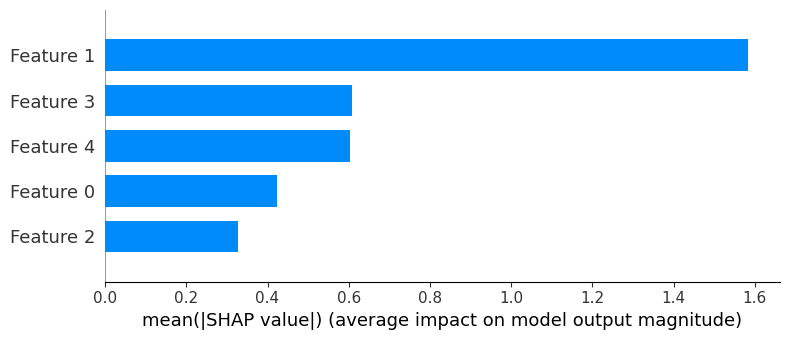

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import torch
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

lable_path = ' '  ### found in 1-label_maker
feature_path = ' ' ### found in 2-feature_maker
node_features = []
node_tags = []
for ch in range(1,23):
    lable = lable_path + '/chr' +str(ch)+'_label.txt'
    feature = feature_path + '/chr' +str(ch) + '.txt'
    l = pd.read_csv(lable,sep = '\t',header = None).values
    f = pd.read_csv(feature,sep = ' ',header = None).values
    node_features.append(f)
    node_tags.append(l.flatten())


import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt


auroc_scores = []
auprc_scores = []

# 22 Cross verification
for i in range(22):
    
    X_test = np.array(node_features[i])
    y_test = np.array(node_tags[i].reshape(-1))

    X_train = np.vstack([node_features[j] for j in range(22) if j != i])
    y_train = np.concatenate([node_tags[j].reshape(-1) for j in range(22) if j != i])

    # make Hi-DSB
    model = HistGradientBoostingClassifier()
    

    # model fit
    model.fit(X_train, y_train)

    
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    
    auroc = roc_auc_score(y_test, y_pred_proba)
    auprc = average_precision_score(y_test, y_pred_proba)
    auroc_scores.append(auroc)
    auprc_scores.append(auprc)

    
    print(f"Fold {i+1}: AUROC: {auroc:.4f}, AUPRC: {auprc:.4f}")


print(f"Average AUROC: {np.mean(auroc_scores):.4f}")
print(f"Average AUPRC: {np.mean(auprc_scores):.4f}")


########Feature improtance
import shap

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

feature_importance = np.abs(shap_values).mean(axis=0)
print(feature_importance)


shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)
plt.savefig('shap_bar_plot.pdf',dpi = 300)
#{0:'ctcf',1:'DNase',2:'H3K4me3',3:'H3K27ac',4:'hic'}


In [2]:
import matplotlib.pyplot as plt
plt.savefig('shap_bar_plot.pdf',dpi = 300)

<Figure size 640x480 with 0 Axes>